#Identitas Diri

Nama  : Illyaz Arya Shihab Kusuma

NIM   : 22.11.5156

Kelas : 22IF10

Link  : https://colab.research.google.com/drive/1SjMIrGHUsaAk99miUV_h5m9VTU9y49lO?usp=sharing

Link Dataset : https://www.kaggle.com/datasets/rahmasleam/breast-cancer

#Import Library

In [23]:
!pip install scikit-learn

In [24]:
from google.colab import drive
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, ConfusionMatrixDisplay

In [25]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/BDM_Content/breast-cancer.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#PreProccessing data

In [26]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [45]:
df['diagnosis'] = df['diagnosis'].replace({'B': 1,'M': 2})

In [29]:
#Kolom diagnosis
df['diagnosis'] = df['diagnosis'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [31]:
# Mencheck apakah ada data yang null
for col_name in df.columns:
    nan_null_count = df[col_name].isnull().sum()
    print(f"Column '{col_name}' has {nan_null_count} null or NaN values.\n==========================================\n")

Column 'id' has 0 null or NaN values.

Column 'diagnosis' has 0 null or NaN values.

Column 'radius_mean' has 0 null or NaN values.

Column 'texture_mean' has 0 null or NaN values.

Column 'perimeter_mean' has 0 null or NaN values.

Column 'area_mean' has 0 null or NaN values.

Column 'smoothness_mean' has 0 null or NaN values.

Column 'compactness_mean' has 0 null or NaN values.

Column 'concavity_mean' has 0 null or NaN values.

Column 'concave points_mean' has 0 null or NaN values.

Column 'symmetry_mean' has 0 null or NaN values.

Column 'fractal_dimension_mean' has 0 null or NaN values.

Column 'radius_se' has 0 null or NaN values.

Column 'texture_se' has 0 null or NaN values.

Column 'perimeter_se' has 0 null or NaN values.

Column 'area_se' has 0 null or NaN values.

Column 'smoothness_se' has 0 null or NaN values.

Column 'compactness_se' has 0 null or NaN values.

Column 'concavity_se' has 0 null or NaN values.

Column 'concave points_se' has 0 null or NaN values.

Column 'sy

In [32]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,1.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,1.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,1.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,2.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,2.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [33]:
print("Duplicate Values =",df.duplicated().sum())

Duplicate Values = 0


In [34]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,2,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,2,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
# Group data by relevant columns and calculate the mode for each group
relevant_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
                    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
                    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
                    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
                    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
                    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

grouped = df.groupby(relevant_columns)['diagnosis'].agg(lambda x: x.mode()[0] if any(x.mode()) else np.nan)

# Replace null values using the calculated modes based on group patterns
df['diagnosis'] = df.apply(lambda row: grouped.get(tuple(row[relevant_columns]), row['diagnosis']), axis=1)

In [36]:
# Count occurrences of 1 and 2
value_counts = df['diagnosis'].value_counts()

# Print the counts
print("Number of 1s:", value_counts[1])
print("Number of 2s:", value_counts[2])

Number of 1s: 357
Number of 2s: 212


In [37]:
# Mencheck apakah ada data yang null
for col_name in df.columns:
    nan_null_count = df[col_name].isnull().sum()
    print(f"Column '{col_name}' has {nan_null_count} null or NaN values.\n==========================================\n")

Column 'id' has 0 null or NaN values.

Column 'diagnosis' has 0 null or NaN values.

Column 'radius_mean' has 0 null or NaN values.

Column 'texture_mean' has 0 null or NaN values.

Column 'perimeter_mean' has 0 null or NaN values.

Column 'area_mean' has 0 null or NaN values.

Column 'smoothness_mean' has 0 null or NaN values.

Column 'compactness_mean' has 0 null or NaN values.

Column 'concavity_mean' has 0 null or NaN values.

Column 'concave points_mean' has 0 null or NaN values.

Column 'symmetry_mean' has 0 null or NaN values.

Column 'fractal_dimension_mean' has 0 null or NaN values.

Column 'radius_se' has 0 null or NaN values.

Column 'texture_se' has 0 null or NaN values.

Column 'perimeter_se' has 0 null or NaN values.

Column 'area_se' has 0 null or NaN values.

Column 'smoothness_se' has 0 null or NaN values.

Column 'compactness_se' has 0 null or NaN values.

Column 'concavity_se' has 0 null or NaN values.

Column 'concave points_se' has 0 null or NaN values.

Column 'sy

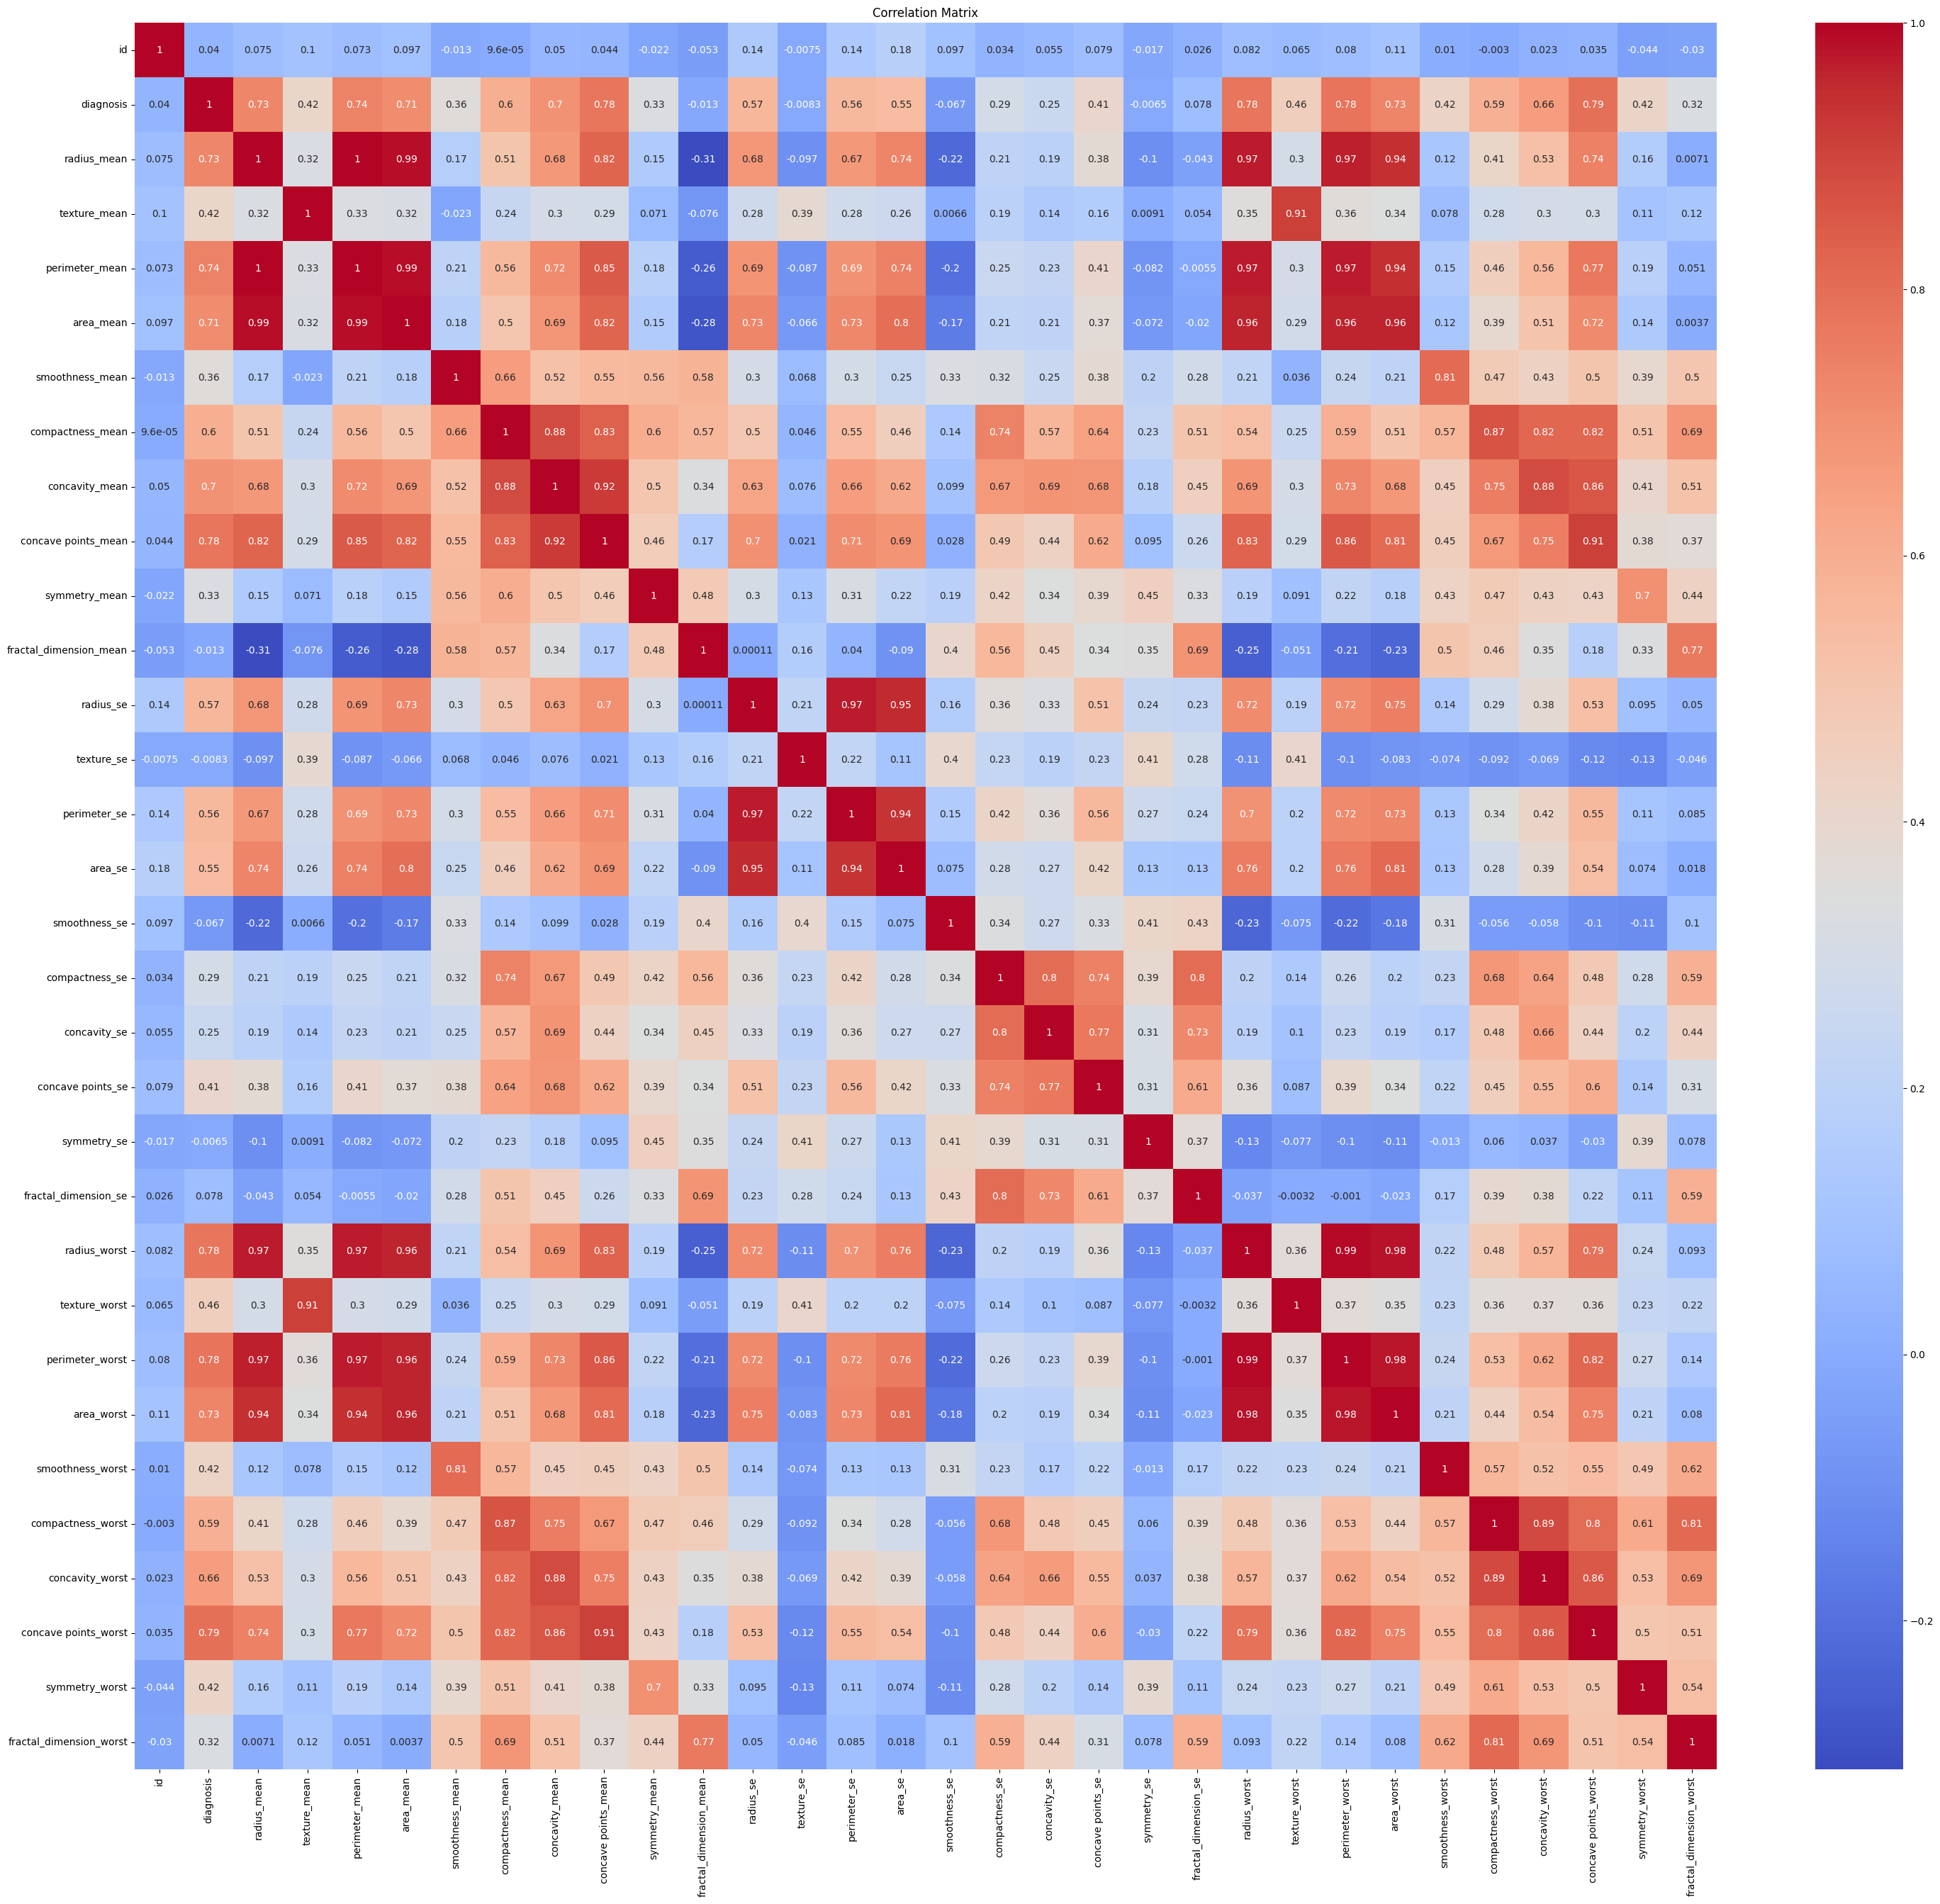

In [38]:
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(36, 32))  # Sesuaikan ukuran jika perlu
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [39]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Filter features based on correlation with the target variable ('diagnosis')
threshold = 0.5  # Set a correlation threshold
selected_features = correlation_matrix[abs(correlation_matrix['diagnosis']) > threshold].index.tolist()

# Remove the target variable from the selected features
selected_features.remove('diagnosis')

# Print the selected features
print("Selected Features:", selected_features)
print("Jumlah Feature yang dipilih :", len(selected_features))

Selected Features: ['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
Jumlah Feature yang dipilih : 15


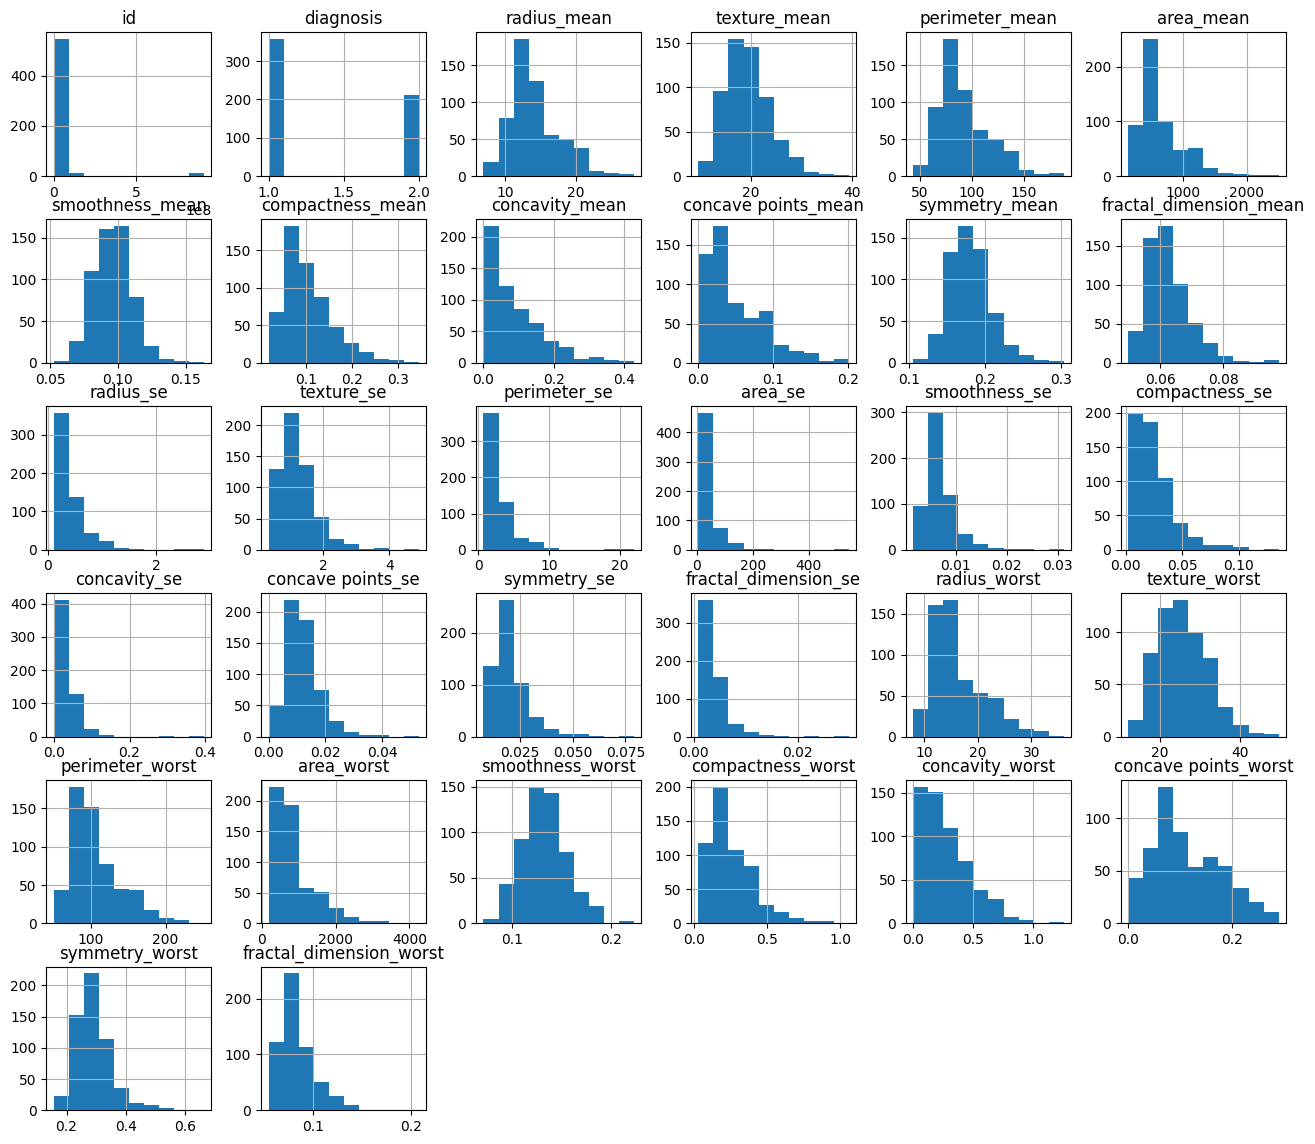

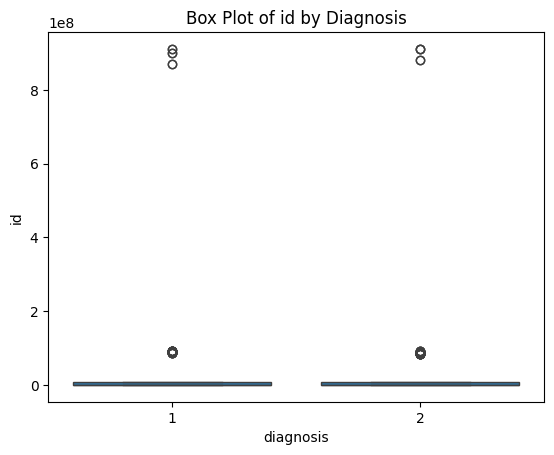

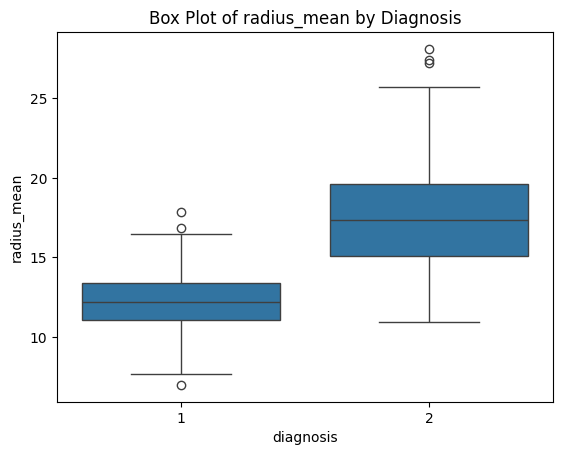

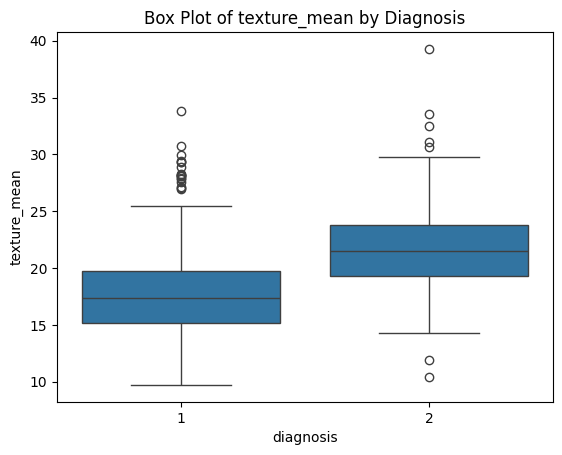

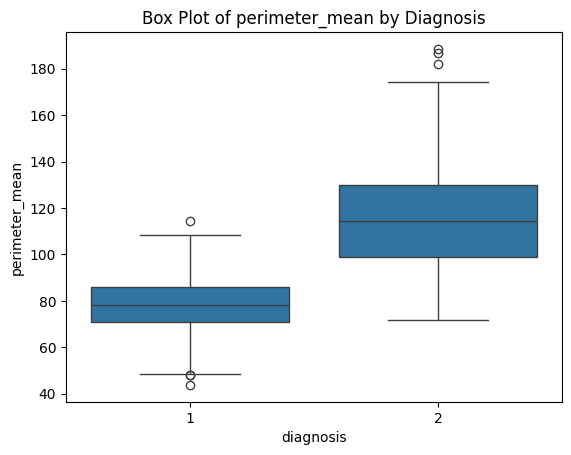

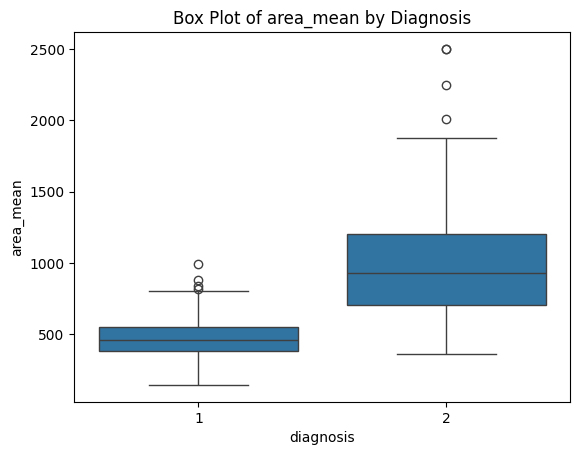

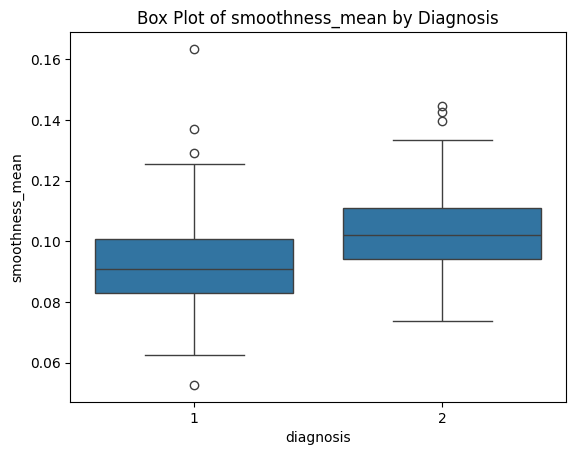

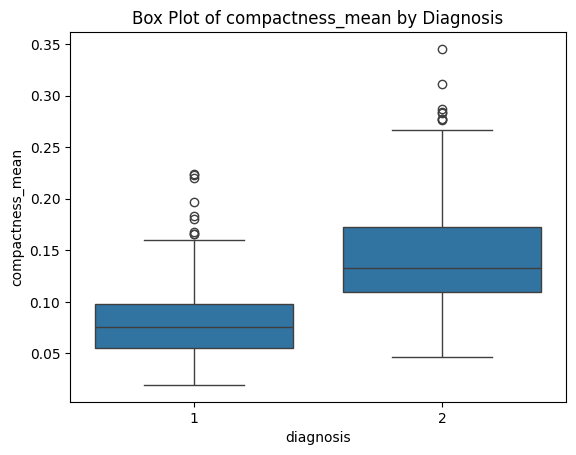

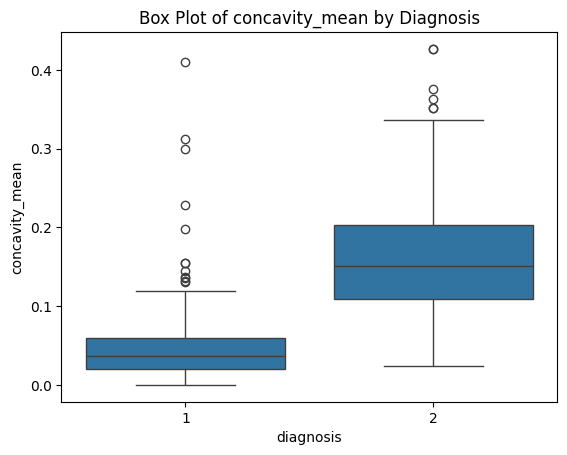

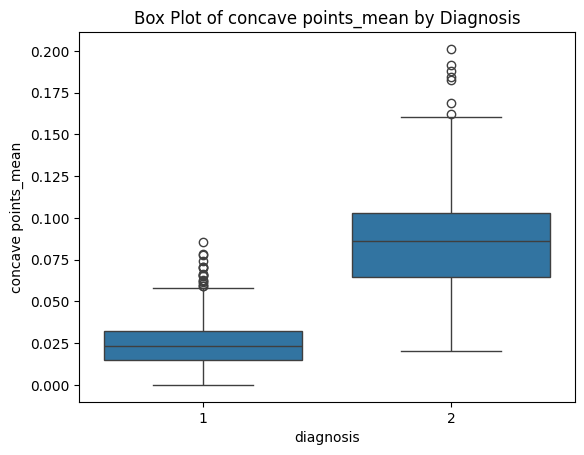

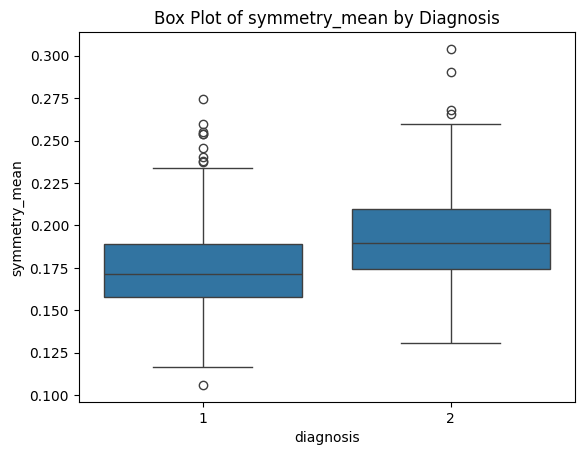

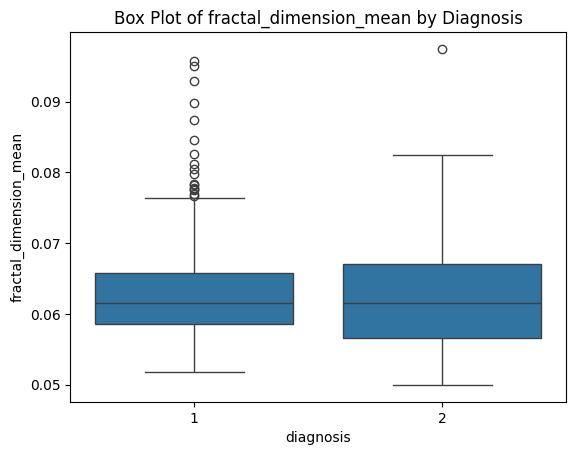

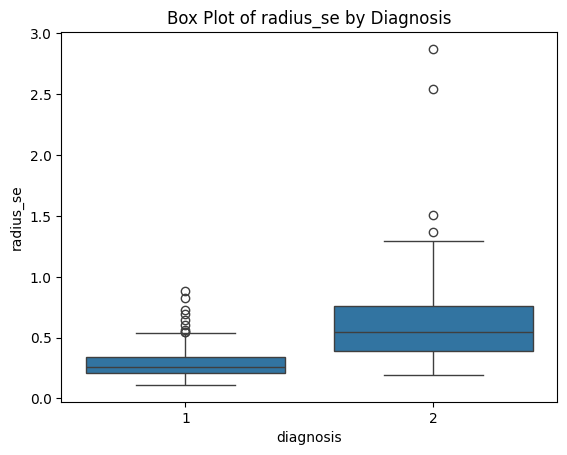

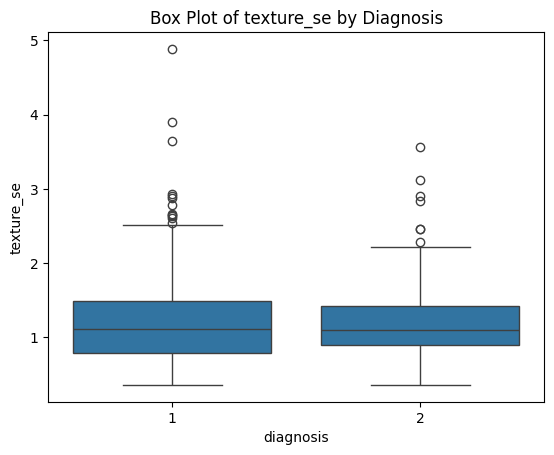

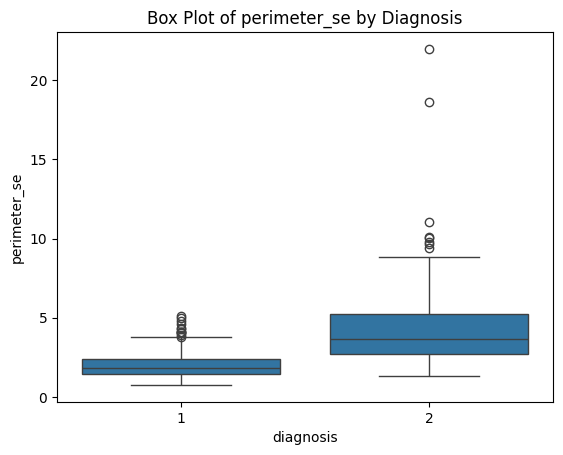

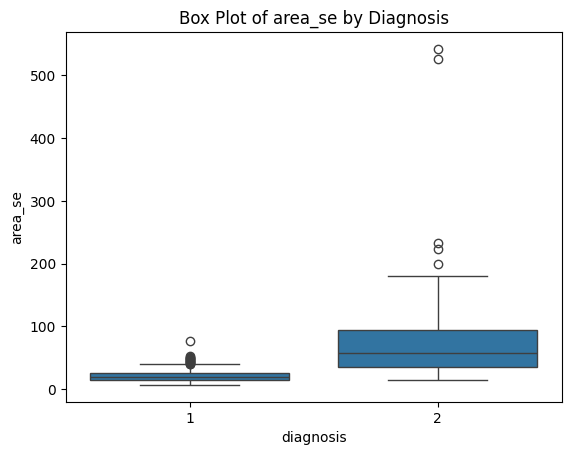

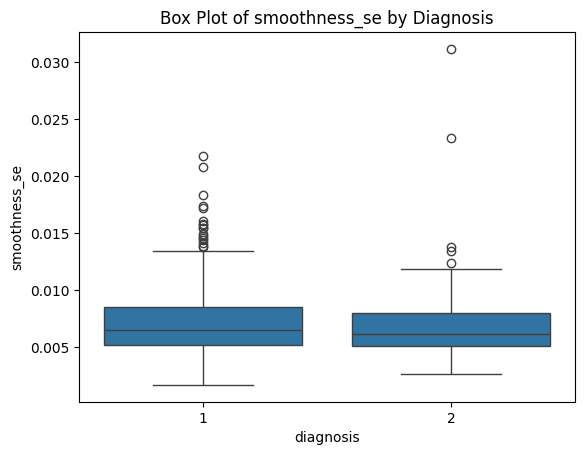

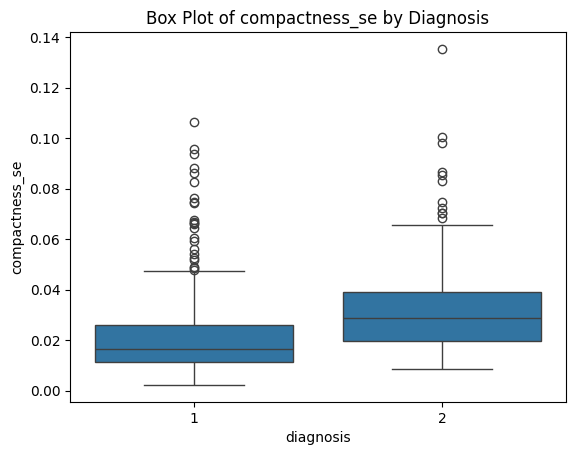

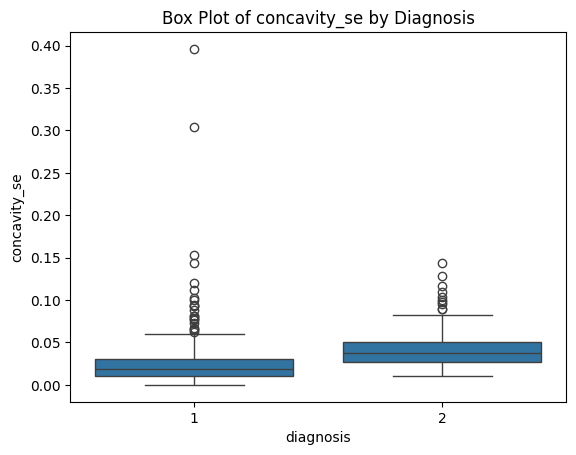

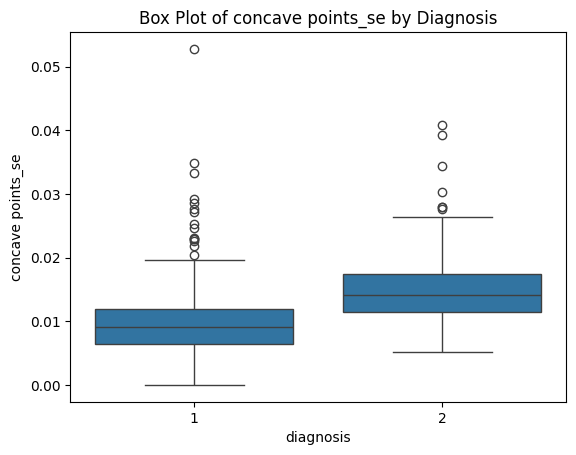

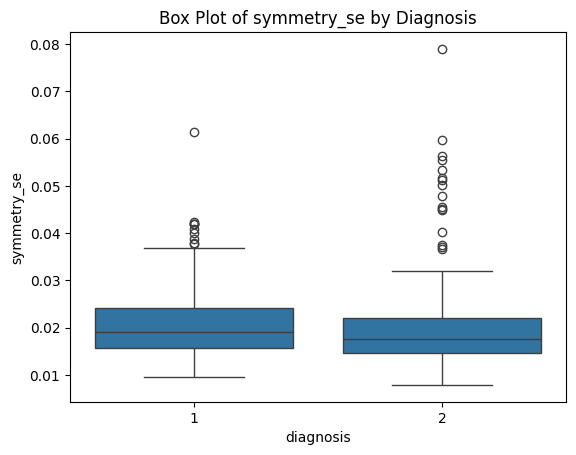

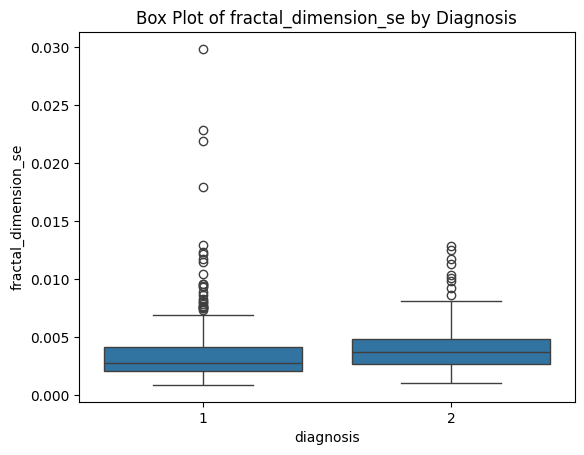

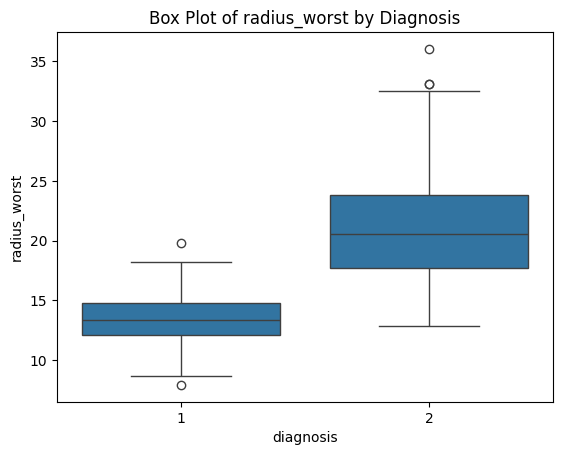

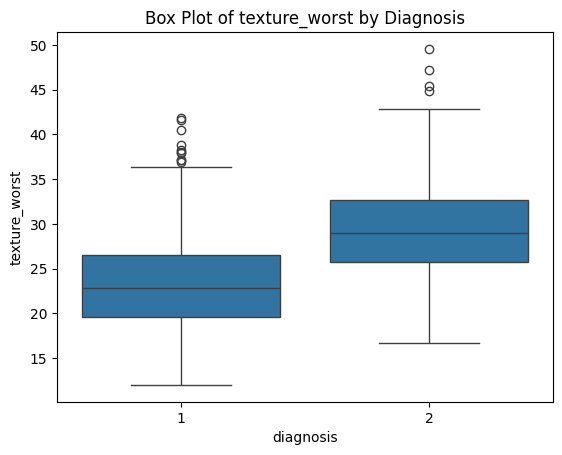

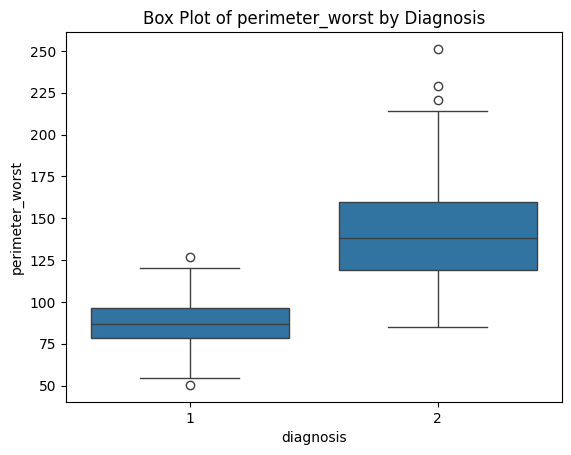

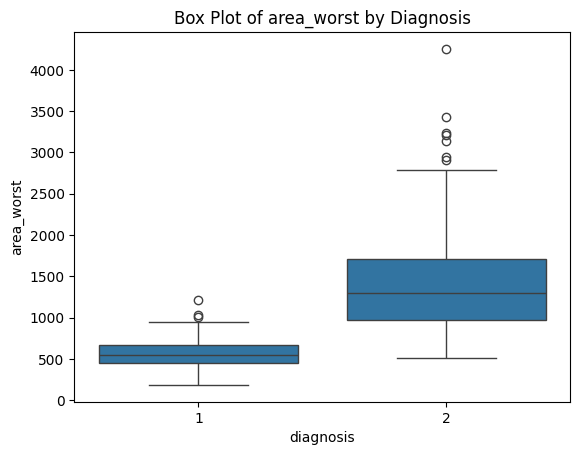

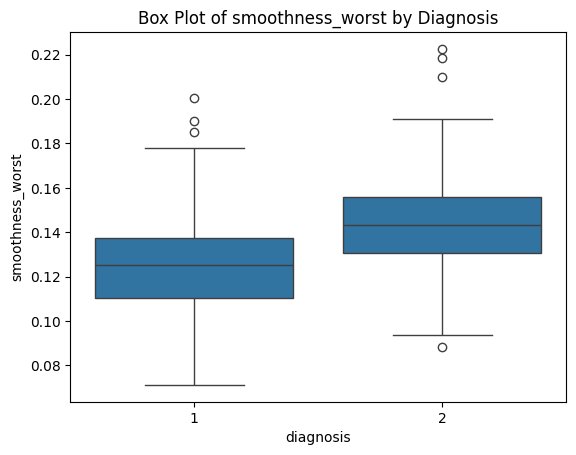

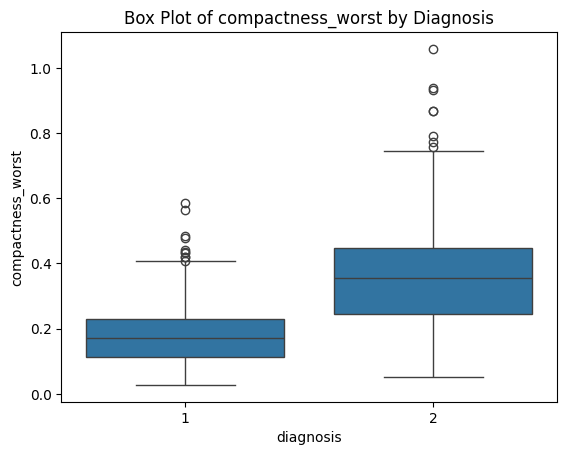

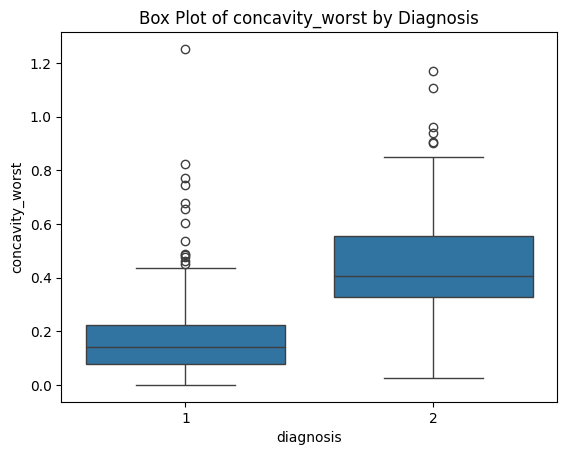

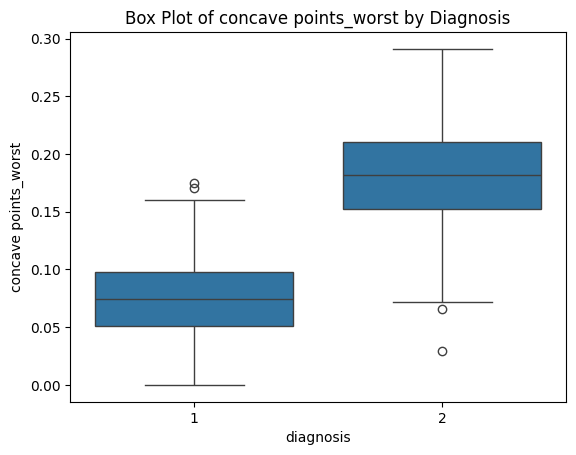

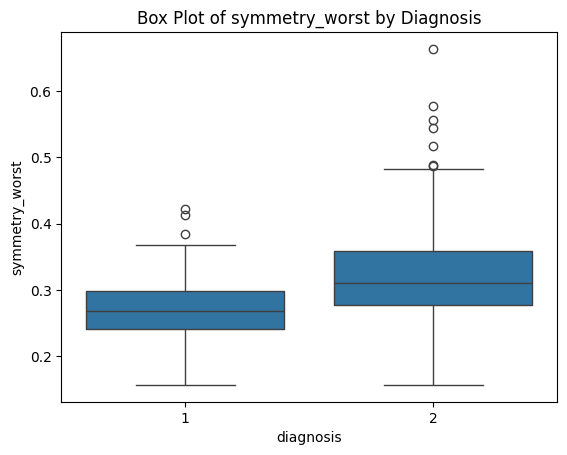

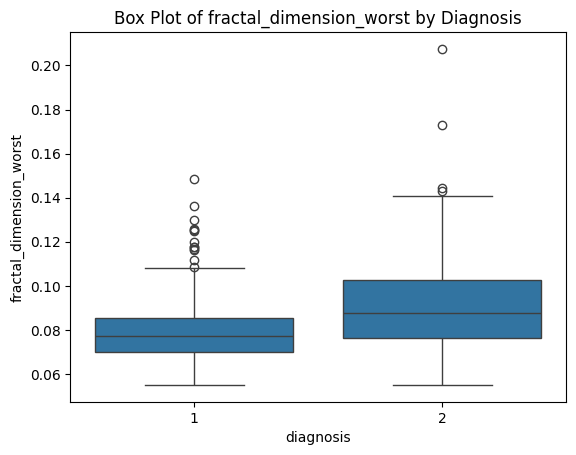

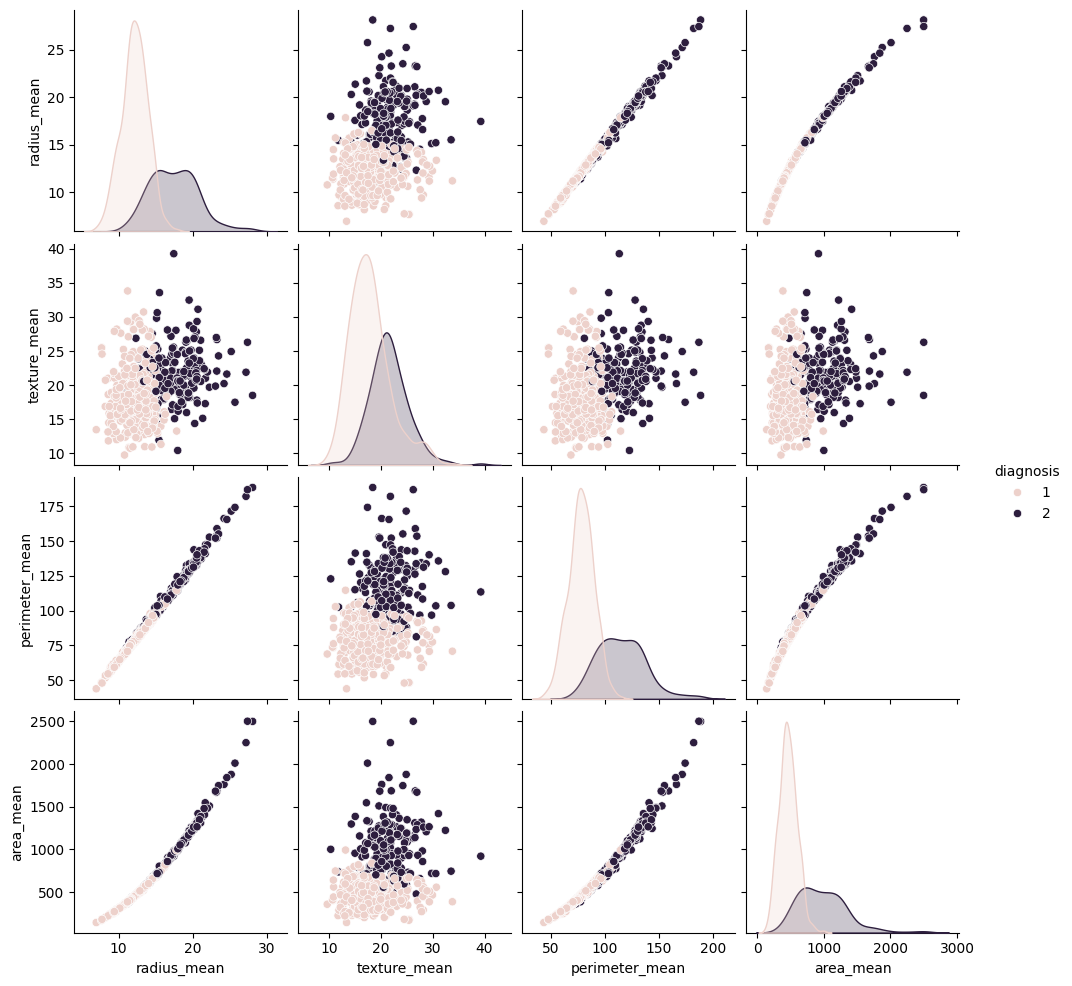

In [40]:
# Histogram untuk fitur numerik
df.hist(figsize=(16, 14))
plt.show()

# Box plot untuk fitur numerik berdasarkan diagnosis
for column in df.select_dtypes(include=['number']).columns:
    if column != 'diagnosis':
        sns.boxplot(x='diagnosis', y=column, data=df)
        plt.title(f'Box Plot of {column} by Diagnosis')
        plt.show()

# Scatter plot untuk melihat hubungan antar fitur
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()

In [41]:
#Membuat variabel independen dan dependen

X = df[selected_features]

Y = df['diagnosis']

# Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("split data train 20%/80% : ", X_train.shape, " test : ", X_test.shape)

split data train 20%/80% :  (455, 15)  test :  (114, 15)


#Gradient Boost Classifier

              precision    recall  f1-score   support

           1       0.96      0.97      0.97        71
           2       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Train ACC	: 1.0
Test ACC	: 0.956140350877193
F1		: 0.965034965034965
ACC cross val 5 : 0.9208791208791209


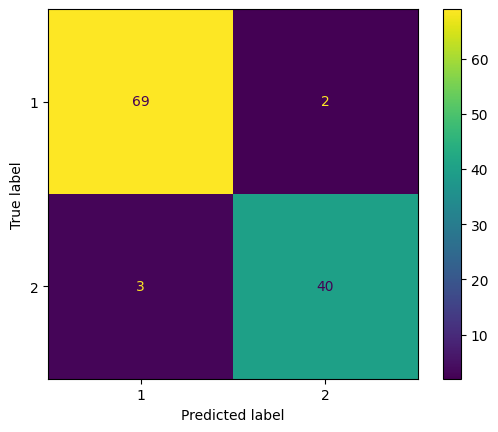

In [42]:
# Inisialisasi model Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42,
                                 learning_rate=0.2,
                                 n_estimators=100,
                                 max_depth=5,
                                 criterion='friedman_mse')

# Melatih model dengan data training
gbc.fit(X_train, Y_train)

# Prediksi dengan data testing
pred = gbc.predict(X_test)

# Akurasi pada data training
tacc = gbc.score(X_train, Y_train)

# Test Accuracy
test_acc = accuracy_score(Y_test, pred)

# Cross-validation dengan 5 fold
cross = cross_val_score(gbc, X_train, Y_train, scoring='accuracy', cv=5)
cross = np.mean(cross)

# Evaluasi performa model
print(classification_report(Y_test, pred))
print('=============================================================')
print(f'Train ACC\t: {tacc}')
print(f'Test ACC\t: {test_acc}')
print('=============================================================')
print(f'F1\t\t: {f1_score(Y_test, pred)}')
print('=============================================================')
print(f'ACC cross val 5 : {cross}')
print('=============================================================')

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, pred)

#Random Forest

In [43]:
# # Inisialisasi model Random Forest
# rfc =RandomForestClassifier(random_state=42,bootstrap= False, criterion= 'entropy',
#                             max_depth= 5, max_features= 'sqrt', n_estimators= 100)

# # Melatih model dengan data training
# rfc.fit(X_train,Y_train)

# # Prediksi dengan data testing
# pred = rfc.predict(X_test)

# # Akurasi pada data training
# tacc=rfc.score(X_train,Y_train)

# # Test Accuracy
# test_acc = accuracy_score(Y_test, pred)

# # Cross-validation dengan 5 fold
# cross = cross_val_score(rfc,X_train,Y_train,scoring='accuracy',cv=5)
# cross = np.mean(cross)

# # Evaluasi performa model
# print(classification_report(Y_test,pred))
# print('=============================================================')
# print(f'Train ACC\t: {tacc}')
# print(f'Test ACC\t: {test_acc}')
# print('=============================================================')
# print(f'F1\t\t: {f1_score(Y_test,pred)}')
# print('=============================================================')
# print(f'ACC cross val 5 : {cross}')
# print('=============================================================')

# # Confusion Matrix
# ConfusionMatrixDisplay.from_predictions(Y_test,pred)